In [86]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.5.1+cu121


# Neural **Network**

In [87]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading dataset

In [89]:
## Loading dataset
url="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df=pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [90]:
# prompt: in specis column convert these  ['setosa', 'versicolor', 'virginica] to  0.0, 1,0 and 2.0

# Assuming your dataframe is named 'df' as in the provided code
# If your dataframe has a different name, replace 'df' with the actual name

species_mapping = {'setosa': 0.0, 'versicolor': 1.0, 'virginica': 2.0}
df['species'] = df['species'].map(species_mapping)
df.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1.0
96,5.7,2.9,4.2,1.3,1.0
97,6.2,2.9,4.3,1.3,1.0
98,5.1,2.5,3.0,1.1,1.0


# generating X and Y values for training and testing

In [91]:
X=df.drop('species',axis=1).values
y=df['species'].values

print('X=',X[:10])
print('y=',y[:10])

X= [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
y= [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Train test split

In [92]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=33)

# converting X and y features to fload tensors

In [93]:
# converting X features to fload tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)

In [94]:
# converting y labels to long tensor
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

# Creating Neural Network Model

In [95]:
  # create a model class that inherit the nn.Modules
  # i) input layer with 4 feature flowers
  # ii) Hidden layer 1 (number of neurons)
  # iii) Hidden layer 2
  # iv) Output 3 class of iris flower
class Model(nn.Module):
    def __init__(self, input_feature=4, hidden1=8, hidden2=9, output_feature=3):
        super().__init__()
        self.fc1 = nn.Linear(input_feature, hidden1)  # First hidden layer
        self.fc2 = nn.Linear(hidden1, hidden2)        # Second hidden layer
        self.out = nn.Linear(hidden2, output_feature) # Output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Apply ReLU activation after the first layer
        x = F.relu(self.fc2(x))  # Apply ReLU activation after the second layer
        x = self.out(x)          # Final output layer
        return x

# pick a mannual seed for randomize
torch.manual_seed(42)
model=Model()

# measuring errors

In [96]:
# measuring errors
criterion=nn.CrossEntropyLoss()
# choose a optimizer
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

# training our models

In [97]:
# training our models
epochs=200
losses=[]
for i in range(epochs):
    # Go forward and get a prediction
    y_pred=model.forward(X_train)
    # Measuring lose/error gonna be at first
    loss=criterion(y_pred,y_train) # predicted value vs y train
    losses.append(loss.detach().numpy())

    # print every 10 epocs
    if i%10==0:
      print(f'Epoc: {i} and loss: {loss}')

    """ Do some back propagation : Take the error rate of forward propagation and feed it back
     through the network to fine tune the weights """
    # Let's say your model predicted 0.7 when the true value was 1.0
    # 1. Clear old gradients (like erasing old work)
    optimizer.zero_grad()

    # 2. Calculate how wrong we were and compute gradients
    loss.backward()    # Figures out how to adjust each weight

    # 3. Update weights to do better next time
    optimizer.step()   # Actually makes the adjustments


Epoc: 0 and loss: 1.079680323600769
Epoc: 10 and loss: 0.914716899394989
Epoc: 20 and loss: 0.7535737752914429
Epoc: 30 and loss: 0.601484477519989
Epoc: 40 and loss: 0.41731730103492737
Epoc: 50 and loss: 0.25342732667922974
Epoc: 60 and loss: 0.15017078816890717
Epoc: 70 and loss: 0.09916127473115921
Epoc: 80 and loss: 0.0777599960565567
Epoc: 90 and loss: 0.068186454474926
Epoc: 100 and loss: 0.06316635012626648
Epoc: 110 and loss: 0.060099657624959946
Epoc: 120 and loss: 0.05798368155956268
Epoc: 130 and loss: 0.05638635531067848
Epoc: 140 and loss: 0.05510531738400459
Epoc: 150 and loss: 0.054032061249017715
Epoc: 160 and loss: 0.053104281425476074
Epoc: 170 and loss: 0.052284497767686844
Epoc: 180 and loss: 0.05184265226125717
Epoc: 190 and loss: 0.0508931428194046


Text(0.5, 0, 'Epoch')

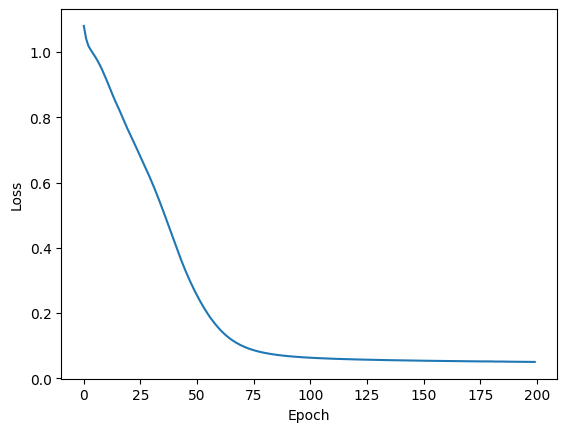

In [98]:
# Graph it out!
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

# evaluate model on Test Data Set

In [99]:
# evaluate model on Test Data Set (validate model on test set)
with torch.no_grad():
  y_eval=model.forward(X_test)# This runs your test data through the trained model to get predictions
  loss=criterion(y_eval,y_test)

The **with torch.no_grad():** context manager is telling PyTorch: "Hey, don't track any gradients here - we're just testing!" This is important because:



1.   During testing, we don't need to update weights
2.   It saves memory since PyTorch won't store gradient information and makes the evaluation faster




In [100]:
loss

tensor(0.0461)

In [101]:
correct=0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val=model.forward(data)
    print(f'{i+1} {str(y_val)} \t\t  {y_test[i]}') # will tell us what type of flower classes our network thinks it is

    ## correct or not correct
    print(y_val.argmax().item(),y_test[i])
    if y_val.argmax().item()==y_test[i]:
      correct+=1

print(f'Accuracy: {correct/len(y_test)}')



1 tensor([-0.4340,  8.4524,  0.8518]) 		  1
1 tensor(1)
2 tensor([0.0942, 9.6095, 0.2782]) 		  1
1 tensor(1)
3 tensor([ 9.2864,  2.7877, -9.3042]) 		  0
0 tensor(0)
4 tensor([-2.3186,  8.0679,  2.8884]) 		  1
1 tensor(1)
5 tensor([-7.6171,  4.5877,  8.6351]) 		  2
2 tensor(2)
6 tensor([-13.0575,   1.0421,  14.5440]) 		  2
2 tensor(2)
7 tensor([ 8.8985,  3.2152, -8.9011]) 		  0
0 tensor(0)
8 tensor([ 10.1395,   2.8130, -10.1995]) 		  0
0 tensor(0)
9 tensor([-7.4050,  4.9376,  8.4055]) 		  2
2 tensor(2)
10 tensor([-9.9005,  3.6723, 11.1121]) 		  2
2 tensor(2)
11 tensor([-10.9882,   2.9391,  12.2921]) 		  2
2 tensor(2)
12 tensor([ 9.1517,  2.4770, -9.1602]) 		  0
0 tensor(0)
13 tensor([-10.3970,   2.7017,  11.6582]) 		  2
2 tensor(2)
14 tensor([-2.6228,  7.5806,  3.2207]) 		  1
1 tensor(1)
15 tensor([-7.4074,  5.0313,  8.4110]) 		  2
2 tensor(2)
16 tensor([0.0652, 9.2694, 0.3117]) 		  1
1 tensor(1)
17 tensor([-5.1048,  5.7209,  5.9185]) 		  2
2 tensor(2)
18 tensor([ 10.3149,   2.8726, -10

# Evaluation

In [102]:
new_iris=torch.tensor([5.7,3.0,4.2,1.2])

In [107]:
with torch.no_grad():
  print(model.forward(new_iris))
  prediction=model.forward(new_iris)

tensor([0.1423, 8.5698, 0.2372])


In [ ]:
species_mapping = {'setosa': 0.0, 'versicolor': 1.0, 'virginica': 2.0}

In [113]:
flower=prediction.argmax().item()
if flower==1:print('Predicted flower is : setosa')
elif flower==2:print('Predicted flower is : versicolor')
else:print('Predicted flower is : virginica')

Predicted flower is : setosa


# Save our NN model

In [114]:
torch.save(model.state_dict(),'iris_nn.pt')